# Kinematic Center of Mass: explanation of the code

## Overview
The calculation of the position of the whole body centre of mass (CoM) is done in two steps. 

### Calculation of the segment coordinate system
First, the body is divided into segments (panel A, blue ovals), and for each segment we calculate the joint centres corresponding to the segment’s origin (panel A, red and yellow dots), the segment coordinate system (SCS) and the segment length l_s.  We use the conventional SCS recommended by the International Society of Biomechanics (Wu et al., 2002, 2005): when a person stands upright in the anatomical position, with the arms at the sides and the palms facing forwards, the X, Y and Z axes of each segment are oriented forwards, upwards and lateral to the right (panel B).

To calculate the joint centers and SCS, the reference method (Dumas et al., 2007a, 2007b, 2015) uses 37 anatomical markers (panel C, markers in red, orange and yellow). A simplified method was proposed (Tisserand et al., 2016) which requires only 13 markers (panel C, markers in red). The code is written in a modular fashion, such that when the complete set of markers is available for a segment, the reference method is applied to that segment. Otherwise, we use either the simplified method or an intermediate version using the markers in orange (panel C), described when applicable. In addition, a method is provided to calculate the pelvis and head SCS from alternative markers (panel C, markers in green). The marker names and definitions are in the table below.

### Regression equations
Then, the segment origin O_s, SCS (X_s, Y_s, Z_s) and length l_s are used to calculate the position of the segment’s CoM according to the following regression equation:

CoM_s=O_s+l_s 100 (x_s X_s+y_s Y_s+z_s Z_s)

Finally, the whole body CoM is calculated as the barycenter of the different segments, weighted by the fraction of the segments’ mass relative to the total body mass M_s/M_tot , according to the following regression equation:

CoM_tot=∑_s M_s/M_tot  CoM_s

The length percents x_s, y_s, z_s and mass fractions M_s/M_tot  are obtained according to the method of (Dumas et al., 2007a, 2007b, 2015). This method uses photogrammetry data of 31 males (mean age 27.5 years old, mean weight 77.3 kg, mean stature 1.77 m) (McConville et al., 1980) and 46 females (mean age 31.2 years old, mean weight 63.9 kg, mean stature 1.61 m) (Young et al., 1983). The values are summarised in (Dumas and Wojtusch, 2018), except for the values for the torso segment, which are taken from (Dumas et al., 2007a) Table 2.

When the length l_distal of a distal segment (head, hand or foot) cannot be estimated from the markers present, it is estimated from the length l_proximal of the segment proximal to it, according to (Tisserand et al., 2016):
l_distal= l_proximal (l_distal_ref)/(l_proximal_ref )
The reference lengths are taken from Dumas et al. (2007a) Table 2 for the torso, and from Dumas and Wojtusch (2018) for the other segments. 



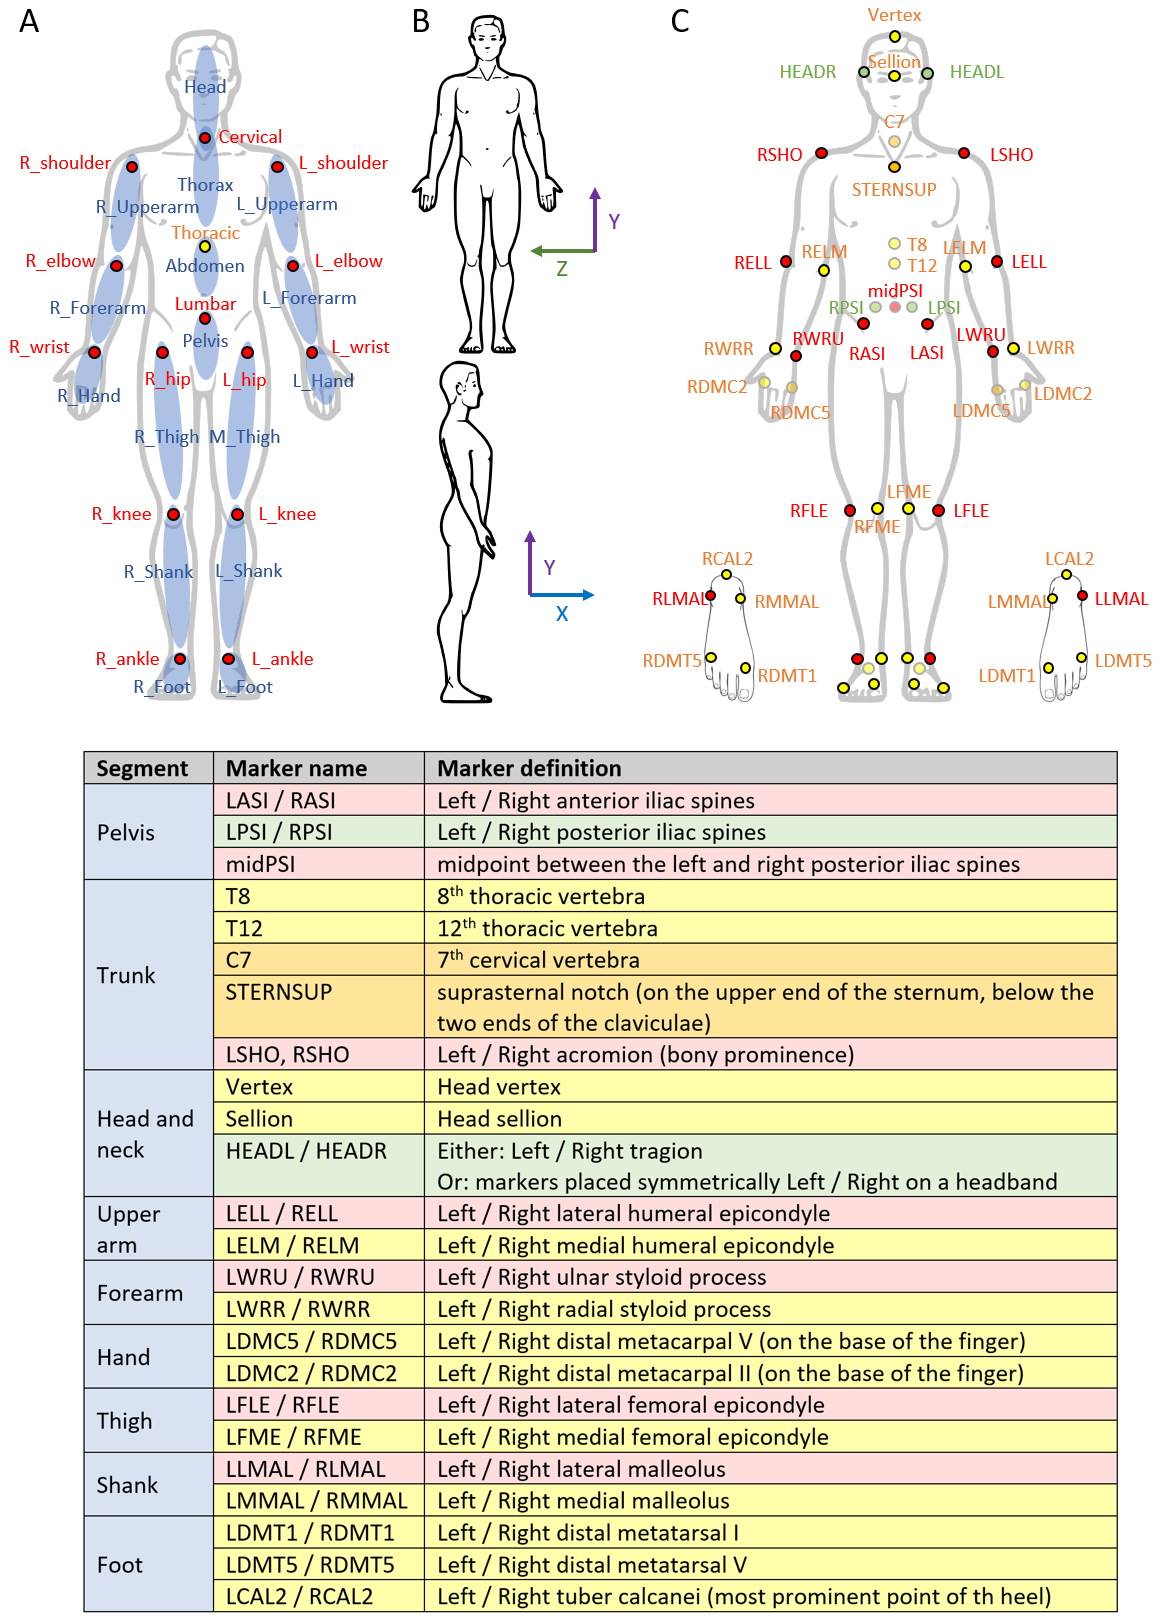

In [1]:
## Anthropometric values

# Segment mass (fraction of the total body mass M_s/M_tot)
Mass_fraction ={  'Head'    : {'female':0.067, 'male':0.067}, # Dumas and Wojtusch, 2018, Table 1
                  'Thorax'  : {'female':0.263, 'male':0.304}, # Dumas and Wojtusch, 2018, Table 2
                  'Abdomen' : {'female':0.041, 'male':0.029}, # Dumas and Wojtusch, 2018, Table 3
                  'Torso'   : {'female':0.304, 'male':0.333}, # Dumas et al., 2007a, Table 2
                  'Pelvis'  : {'female':0.147, 'male':0.142}, # Dumas and Wojtusch, 2018, Table 4
                  'UpperArm': {'female':0.023, 'male':0.024}, # Dumas and Wojtusch, 2018, Table 5
                  'Forearm' : {'female':0.014, 'male':0.017}, # Dumas and Wojtusch, 2018, Table 6
                  'Hand'    : {'female':0.005, 'male':0.006}, # Dumas and Wojtusch, 2018, Table 7
                  'Thigh'   : {'female':0.146, 'male':0.123}, # Dumas and Wojtusch, 2018, Table 8
                  'Shank'   : {'female':0.045, 'male':0.048}, # Dumas and Wojtusch, 2018, Table 9
                  'Foot'    : {'female':0.010, 'male':0.012}} # Dumas and Wojtusch, 2018, Table 10

# Segment CoM position (% segment length) in the following order: forwards (x_s), upwards (y_s), rightwards (z_s)
Length_percent = {'Head'    :{'female':[0.8,55.9,-0.1],  'male':[2.0,53.4,0.1]},   # Dumas and Wojtusch, 2018, Table 1
                  'Thorax'  :{'female':[1.5,-54.2,0.1],  'male':[0,-55.5,-0.4]},   # Dumas and Wojtusch, 2018, Table 2
                  'Abdomen' :{'female':[21.9,-41.0,0.3], 'male':[17.6,-36.1,-3.3]},# Dumas and Wojtusch, 2018, Table 3
                  'Torso'   :{'female':[-1.6,-43.6,-0.6],'male':[-3.6,-42.0,-0.2]},# Dumas et al. 2007a, Table 2
                  'Pelvis'  :{'female':[-7.2,-22.8,0.2], 'male':[-0.2,-28.2,-0.6]},# Dumas and Wojtusch, 2018, Table 4
                  'UpperArm':{'female':[-5.5,-50.0,-3.3],'male':[1.8,-48.2,-3.1]}, # Dumas and Wojtusch, 2018, Table 5 
                  'Forearm' :{'female':[2.1,-41.1,1.9],  'male':[-1.3,-41.7,1.1]}, # Dumas and Wojtusch, 2018, Table 6
                  'Hand'    :{'female':[7.7,-76.8,4.8],  'male':[8.2,-83.9,7.5]},  # Dumas and Wojtusch, 2018, Table 7
                  'Thigh'   :{'female':[-7.7,-37.7,0.8], 'male':[-4.1,-42.9,3.3]}, # Dumas and Wojtusch, 2018, Table 8
                  'Shank'   :{'female':[-4.9,-40.4,3.1], 'male':[-4.8,-41.0,0.7]}, # Dumas and Wojtusch, 2018, Table 9
                  'Foot'    :{'female':[38.2,-30.9,5.5], 'male':[50.2,-19.9,3.4]}} # Dumas and Wojtusch, 2018, Table 10

# Reference segment lengths (in mm)
Ref_length =    { 'Head'   : {'female':243, 'male':278}, # Dumas and Wojtusch, 2018, Table 1
                  'Thorax' : {'female':322, 'male':334}, # Dumas and Wojtusch, 2018, Table 2
                  'Torso'  : {'female':429, 'male':477}, # Dumas et al. 2007a, Table 2
                  'Forearm': {'female':247, 'male':283}, # Dumas and Wojtusch, 2018, Table 6
                  'Hand'   : {'female':71,  'male':80},  # Dumas and Wojtusch, 2018, Table 7
                  'Shank'  : {'female':388, 'male':433}, # Dumas and Wojtusch, 2018, Table 9
                  'Foot'   : {'female':117, 'male':139}} # Dumas and Wojtusch, 2018, Table 10


## Input data

The data necessary for the calculation are:

- Labels: the list of the marker names
- Position: a dictionary with, for each of the marker names in Labels, the timecourse of the 3D position of that marker ((3,NbOrSamples) numpy.ndarray).
- the sex of the subject: 'female' or 'male'


In [2]:
import pickle
input_file     = '..\\examples\\example_data.pkl'
pickle_file    = open(input_file,'rb')
data           = pickle.load(pickle_file)
pickle_file.close()
sex            = data['sex']                # 'female' or 'male'
Labels         = data['Labels']             # list of marker labels
Position       = data['Position']           # dictionary with, for each marker, the position in meters (numpy.ndarray of shape (3,duration*Position_frequency)

## Kinematics object

We collect the kinematic data into a Kinematics object, which generates additional attributes: Joint_centers, SegmentCoordinateSystem, SegmentLength and SegmentOrigin. We provide further explanation as to how the joint centers and coordinate systems are calculated below.

In [3]:
class Kinematics:
    '''A class representing the kinematics

    Attributes
    ----------
    sex : str
        sex of the person whose kinematics were recorded, either 'male' or 'female'
    Labels : list
        list of the marker names whose trajectories were recorded
    Position : (dict of str : (3, NbOfSamples) numpy.ndarray)
        Dictionary of 'marker name': 3D trajectory of the marker
    Joint_centers : (dict of str : (3, NbOfSamples) numpy.ndarray)
        Dictionary of 'joint name': 3D trajectory of the joint's center
    SegmentCoordinateSystem : (dict of str : (3, 3, NbOfSamples) numpy.ndarray)
        Dictionary of 'segment name': numpy.array([x_segment, y_segment, z_segment]), 
        where x_segment, y_segment and z_segment are the 3D trajectories of the segment coordinate system's antero-posterior (forwards), longitudinal (upwards) and lateral (rightwards) axes.
    SegmentLength : (dict of str: float)
        Dictionary of 'segment name': length of the segment
    SegmentOrigin : (dict of str : (3, NbOfSamples) numpy.ndarray)
        Dictionary of 'segment name': 3D trajectory of the segment's origin    
    '''

    def __init__(self, Position, Labels, sex):
        ''''initialises a Kinematics object
        
        Parameters
        ----------
        Position : (dict of str : (3, NbOfSamples) numpy.ndarray)
            Dictionary of 'marker name': 3D trajectory of the marker
        Labels : list
            list of the marker names whose trajectories were recorded
        sex : str
            sex of the person whose kinematics were recorded, either 'male' or 'female'
        '''
        self.Position    = Position
        self.Labels      = Labels
        self.sex         = sex
        self.Joint_centers           = {}
        self.SegmentCoordinateSystem = {}
        self.SegmentLength           = {}
        self.SegmentOrigin           = {}
        
    def calculate_Pelvis(self, Labels):
        '''calculates the coordinate system, length and origin of the pelvis segment, and the lumbar, right hip and left hip joint centers
        
        Parameters
        ----------
        Labels : list
            The list of markers used for calculating the pelvis (must include 'LASI','RASI' and either 'PSI' or 'LPSI' and 'RPSI').
        '''
        Pelvis(self.Position, Labels, self.sex, self.Joint_centers, self.SegmentCoordinateSystem, self.SegmentLength, self.SegmentOrigin)
    def calculate_Trunk(self, Labels):
        '''calculates the coordinate system, length and origin of the trunk segments (either the Torso, or the Abdomen and Thorax, depending on the markers available), 
        and the cervical, right shoulder and left shoulder centers
        
        Parameters
        ----------
        Labels : list
            The list of markers used for calculating the trunk.
        '''
        if 'Lumbar' not in self.Joint_centers.keys():
            print('Calculating the lumbar joint center for the trunk')  
            self.calculate_Pelvis(self.Labels)
        Trunk(self.Position, Labels, self.sex, self.Joint_centers, self.SegmentCoordinateSystem, self.SegmentLength, self.SegmentOrigin)
    def calculate_Head(self, Labels):
        '''calculates the coordinate system, length and origin of the head
        
        Parameters
        ----------
        Labels : list
            The list of markers used for calculating the head.
        '''
        if 'Cervical' not in self.Joint_centers.keys():
            print('Calculating the cervical joint center for the head')
            self.calculate_Trunk(self.Labels)
        Head(self.Position, Labels, self.sex, self.Joint_centers, self.SegmentCoordinateSystem, self.SegmentLength, self.SegmentOrigin)
    def calculate_UpperLimbs(self, Labels):
        '''calculates the coordinate systems, lengths and origins and joint centers of the upper limb segments: 
        upper arm, lower arm and hand of the left and right sides
        
        Parameters
        ----------
        Labels : list
            The list of markers used for calculating the upper limbs (must include 'LELL','LWRU','RELL' and'RWRU')
        '''
        for side in ['L','R']:
            if side+'_shoulder' not in self.Joint_centers.keys():
                print('Calculating the shoulder joint centers for the upper limbs')
                self.calculate_Trunk(self.Labels)
        UpperLimbs(self.Position, Labels, self.sex, self.Joint_centers, self.SegmentCoordinateSystem, self.SegmentLength, self.SegmentOrigin)
    def calculate_LowerLimbs(self, Labels):
        '''calculates the coordinate systems, lengths and origins and joint centers of the lower limb segments:
        shank, thigh and foot of the left and right sides
        
        Parameters
        ----------
        Labels : list
            The list of markers used for calculating the lower limbs (must include 'LFLE','LLMAL','RFLE' and 'RLMAL')
        '''
        for side in ['L','R']:
            if side+'_hip' not in self.Joint_centers.keys():
                print('Calculating the hip joint centers for the lower limbs')
                self.calculate_Pelvis(self.Labels)
        LowerLimbs(self.Position, Labels, self.sex, self.Joint_centers, self.SegmentCoordinateSystem, self.SegmentLength, self.SegmentOrigin)

    def Segment_CoM(self, segment):
        '''calculates the mass and trajectory of the Center of Mass of the segment
        
        Parameters
        ----------
        segment: str
            name of the segment
            
        Returns
        -------   
        segment_mass: float
            fraction of the body mass attributed to the segment
        segment_com: (3, NbOfSamples) numpy.ndarray
            3D trajectory of the segment Center of Mass          
        '''
        if segment.startswith('L') or segment.startswith('R'):
            segment_mass = Mass_fraction[segment[2:]][self.sex]
            com_scaling  = Length_percent[segment[2:]][self.sex]
        else:    
            segment_mass = Mass_fraction[segment][self.sex]
            com_scaling  = Length_percent[segment][self.sex]
        (X,Y,Z) = self.SegmentCoordinateSystem[segment]
        segment_com = self.SegmentOrigin[segment]+self.SegmentLength[segment]/100*(X*com_scaling[0]+Y*com_scaling[1]+Z*com_scaling[2])
        return segment_mass, segment_com
        
    def calculate_CoM(self):
        '''calculates the whole body Center of Mass
        
        Returns
        -------   
        (3, NbOfSamples) numpy.ndarray
            3D trajectory of the whole body Center of Mass          
        '''
        Segments    = list(self.SegmentCoordinateSystem.keys())
        
        if 'Pelvis' not in Segments:
            self.calculate_Pelvis(self.Labels)
        if 'Torso' not in Segments and not set(['Thorax','Abdomen']).issubset(Segments):
            self.calculate_Trunk(self.Labels)
        if 'Head' not in Segments:
            self.calculate_Head(self.Labels)
        if not set(['L_UpperArm','L_Forearm','L_Hand','R_UpperArm','R_Forearm','R_Hand']).issubset(Segments):
            self.calculate_UpperLimbs(self.Labels)
        if not set(['L_Thigh','L_Shank','L_Foot','R_Thigh','R_Shank','R_Foot']).issubset(Segments):
            self.calculate_LowerLimbs(self.Labels)
            
        # Segments used for the calculation of the CoM    
        CoM_segments = ['Pelvis','Head']
        for segment in ['UpperArm','Forearm','Hand','Thigh','Shank','Foot']:
            for side in ['L_','R_']:
                CoM_segments.append(side+segment)
        if set(['Thorax','Abdomen']).issubset(self.SegmentCoordinateSystem.keys()):
            CoM_segments.append('Thorax')
            CoM_segments.append('Abdomen')
        else:
            CoM_segments.append('Torso')
            
        NrOfSamples = numpy.shape(self.Position[self.Labels[0]])[1]    
        CoM  = numpy.zeros((3,NrOfSamples))
        Mass = 0
        for segment in CoM_segments:
            SegmentMass, SegmentCoM = self.Segment_CoM(segment)
            Mass += SegmentMass
            CoM  += SegmentMass*SegmentCoM
        return CoM/Mass

In [4]:
kinematics    = Kinematics(Position, Labels, sex)

## Geometric functions

In [5]:
import numpy

def Normalise(vector):
    '''Function to normalise a vector
    
    Parameters
    ----------
    vector: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the vector
        
    Returns
    -------   
    (3,NbOrSamples) numpy.ndarray
        3D trajectory of the normalised vector
    '''
    return vector/numpy.sqrt(numpy.sum(vector**2, axis = 0))

def Distance (point1, point2):
    '''Function which returns the median (over time) of the euclidian distance between two points
    
    Parameters
    ----------
    point1: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the first point 
    point2: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the second point 
        
    Returns
    -------   
    float
        distance between the two points
    '''
    return numpy.median(numpy.sqrt(numpy.sum((point1-point2)**2, axis = 0)))

def Projection(vector, direction) : 
    '''Function to project a vector onto a direction (which must be a normalised vector)
    
    Parameters
    ----------
    vector: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the vector to be projected
    direction: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the direction on which the vector will be projected    
        
    Returns
    -------   
    (3,NbOrSamples) numpy.ndarray
        3D trajectory of the projected vector
    '''
    return direction*numpy.sum(vector*direction, axis = 0)


## Visualisation function

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib widget
instant = 500 # timepoint at which the data will be visualised

def visualise(kinematics, segments = [], xlim = [1,2.8], ylim = [-0.9,0.9], zlim = [0,1.8], instant = instant):
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection="3d")
    for marker in kinematics.Labels:
        position = kinematics.Position[marker][:,instant]
        ax.scatter(position[0],position[1],position[2], color = 'k', s=0.5)
    for segment in segments:
        origin   = kinematics.SegmentOrigin[segment][:,instant]
        if segment == 'Head':
            endpoint = origin + kinematics.SegmentLength[segment]*kinematics.SegmentCoordinateSystem[segment][1][:,instant]
        elif segment.endswith('Foot'):
            endpoint = origin + kinematics.SegmentLength[segment]*kinematics.SegmentCoordinateSystem[segment][0][:,instant]  
        else:
            endpoint = origin - kinematics.SegmentLength[segment]*kinematics.SegmentCoordinateSystem[segment][1][:,instant] 
        ax.scatter(origin[0],origin[1],origin[2], label = segment)
        ax.plot([origin[0],endpoint[0]],[origin[1],endpoint[1]],[origin[2],endpoint[2]]) 
    ax.legend()    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    return ax

## Trunk and head segments

### Pelvis: hip and lumbar joint centers
The markers required for the calculation of the joint centers are: the left and right anterior iliac spines (LASI, RASI), and the midpoint between the left and right posterior iliac spines (midPSI).

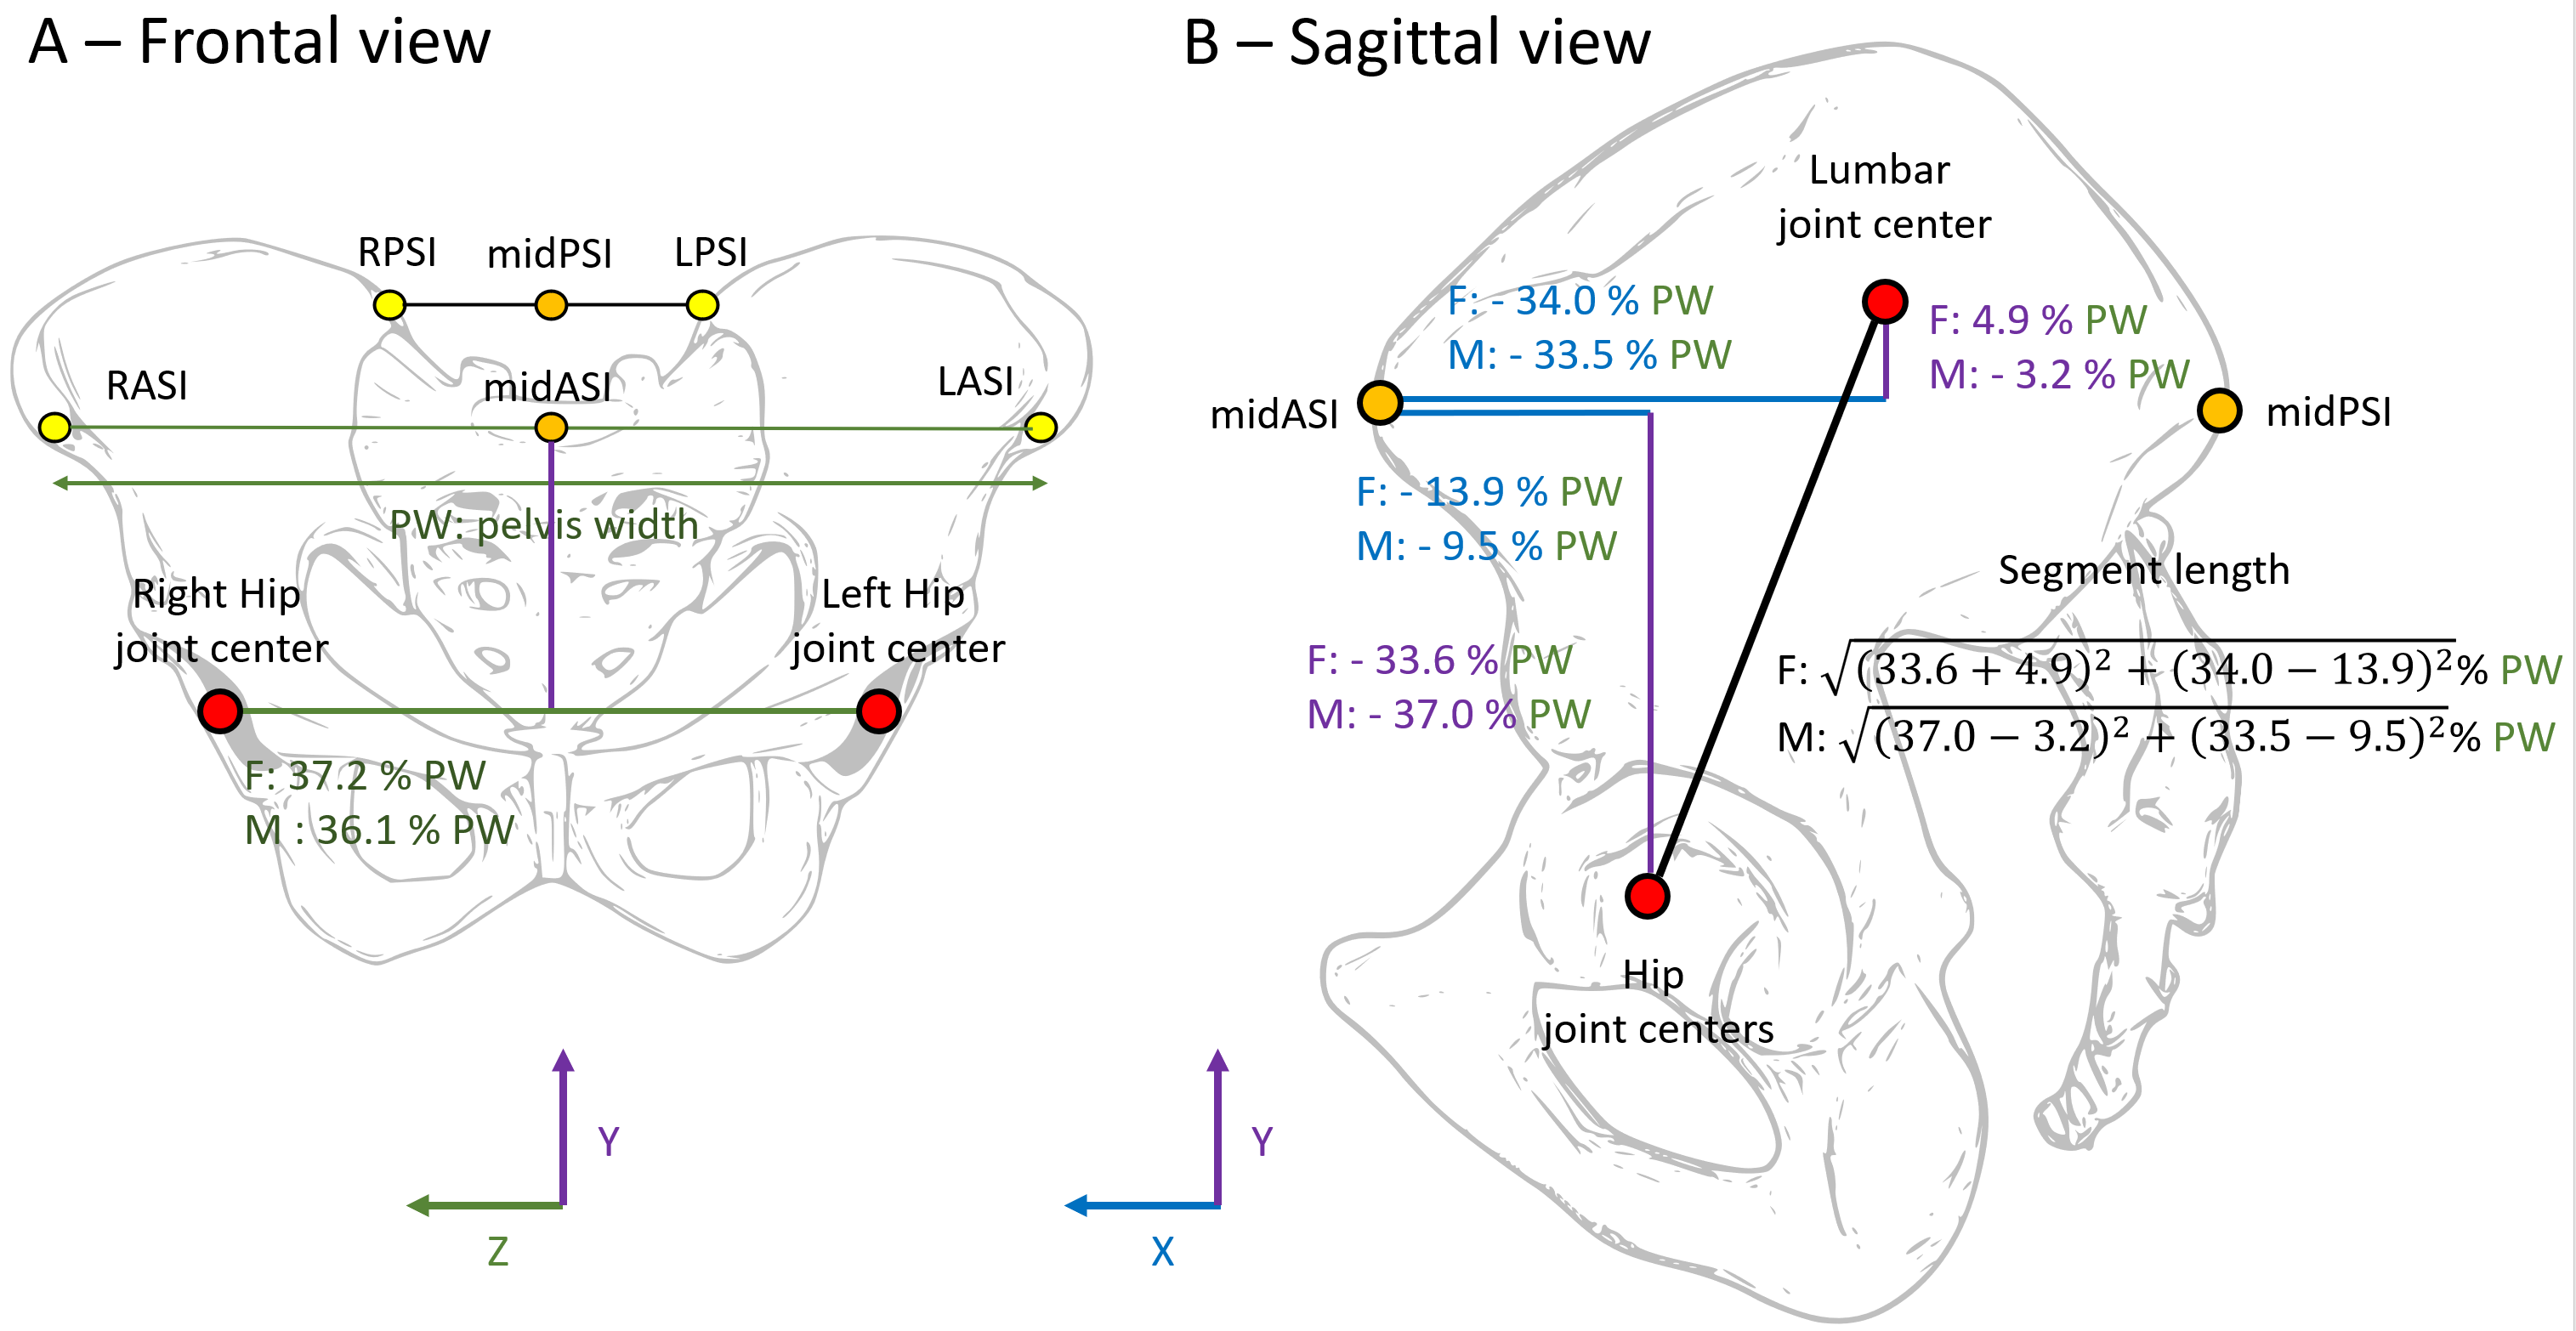

In [7]:
## Scaling relations for the hip and lumbar joint centers in the ISB pelvis coordinate system (from Dumas and Wojtusch 2018)
# distance to the midASI, as a fraction of pelvis width
# The scaling factors are provided in the following order: forwards, upwards, rightwards
Pelvis_scaling = {'Lumbar':{'female':[-0.34,0.049,0],       'male':[-0.335,-0.032,0]},
                  'R_hip': {'female':[-0.139,-0.336,0.372], 'male':[-0.095,-0.37,0.361]},
                  'L_hip': {'female':[-0.139,-0.336,-0.372],'male':[-0.095,-0.37,-0.361]}}

def Pelvis(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin):
    # If the PSI is not directly available, it is calculated as the mid-point between LPSI and RPSI
    if 'PSI' not in Labels and 'LPSI' in Labels and 'RPSI' in Labels:
        midPSI = 0.5*(Position['LPSI']+Position['RPSI'])
    elif 'PSI' in Labels:
        midPSI = Position['PSI']
    else:
        print('posterior hip markers not available')
        
    if 'LASI' in Labels and 'RASI' in Labels:
        ## ISB pelvis coordinate system (Wu et al. 2002)
        # The Z direction is parallel to the line from LASI to RASI
        Z = Normalise(Position['RASI'] - Position['LASI'])
        # we calculate the mid-point between LASI and RASI
        midASI = 0.5*(Position['LASI']+Position['RASI'])
        # The Y direction is orthogonal to the plane containing LASI, RASI and midPSI, pointing upwards
        Y = Normalise(numpy.cross(Z, midASI - midPSI,axis = 0))
        # The X direction is orthogonal to the Y and Z directions, pointing forwards.
        X = Normalise(numpy.cross(Y,Z,axis = 0))

        # Pelvis width : median distance between LASI and RASI
        pelvis_width   = Distance(Position['LASI'],Position['RASI'])

        # The positions of the joint centers are provided relative to midASI, as a fraction of pelvis width
        Lumbar_JC = midASI+ pelvis_width*(X*Pelvis_scaling['Lumbar'][sex][0]+Y*Pelvis_scaling['Lumbar'][sex][1]+Z*Pelvis_scaling['Lumbar'][sex][2])
        R_Hip_JC  = midASI+ pelvis_width*(X*Pelvis_scaling['R_hip'][sex][0] +Y*Pelvis_scaling['R_hip'][sex][1] +Z*Pelvis_scaling['R_hip'][sex][2])
        L_Hip_JC  = midASI+ pelvis_width*(X*Pelvis_scaling['L_hip'][sex][0] +Y*Pelvis_scaling['L_hip'][sex][1] +Z*Pelvis_scaling['L_hip'][sex][2])

        Joint_centers['Lumbar']           = Lumbar_JC
        Joint_centers['R_hip']            = R_Hip_JC
        Joint_centers['L_hip']            = L_Hip_JC
        SegmentCoordinateSystem['Pelvis'] = (X, Y, Z)
        SegmentOrigin['Pelvis']           = Joint_centers['Lumbar']

        # Distance between the lumbar joint center and the projection of the hip joint center onto the sagittal plane
        Lumbar_to_hip = numpy.array(Pelvis_scaling['Lumbar'][sex])-numpy.array(Pelvis_scaling['R_hip'][sex])
        SegmentLength['Pelvis'] = pelvis_width*numpy.sqrt(Lumbar_to_hip[0]**2+Lumbar_to_hip[1]**2**2)
    
    else:
        print('anterior hip markers not available')

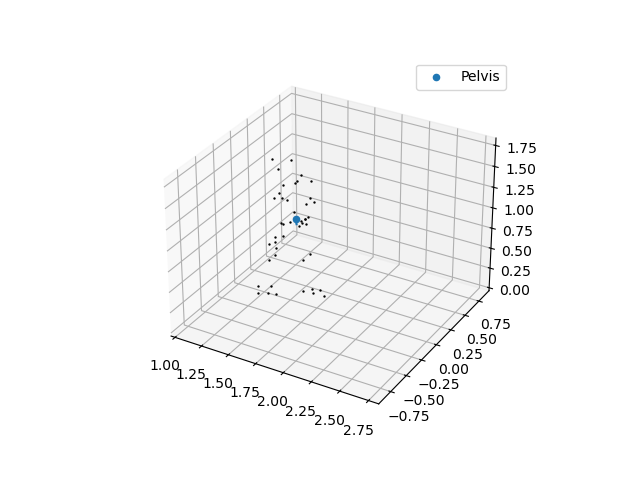

In [8]:
kinematics.calculate_Pelvis(kinematics.Labels)
visualise(kinematics, segments = ['Pelvis'])
plt.show()

### Trunk: thoracic, cervical and shoulder joint centers
Depending on the markers present, the trunk is either decomposed into two segments (thorax and abdomen) or considered as a single segment. The markers necessary for the calculation of the thoracic and joint center are: the 8th and 12th thoracic vertebra (T8 and T12), the 7th cervical vertebra (C7) and the suprasternal notch (STERNSUP). If T8 and T12 are not both present, the thoracic joint center  cannot be calculated, and the abdomen and thorax are merged into a single torso segment, as in Dumas et al. (2007). If C7 and STERNSUP are not both present, the cervical and shoulder joint centers are calculated according to a simplified method adpated from Tisserand et al. (2016).
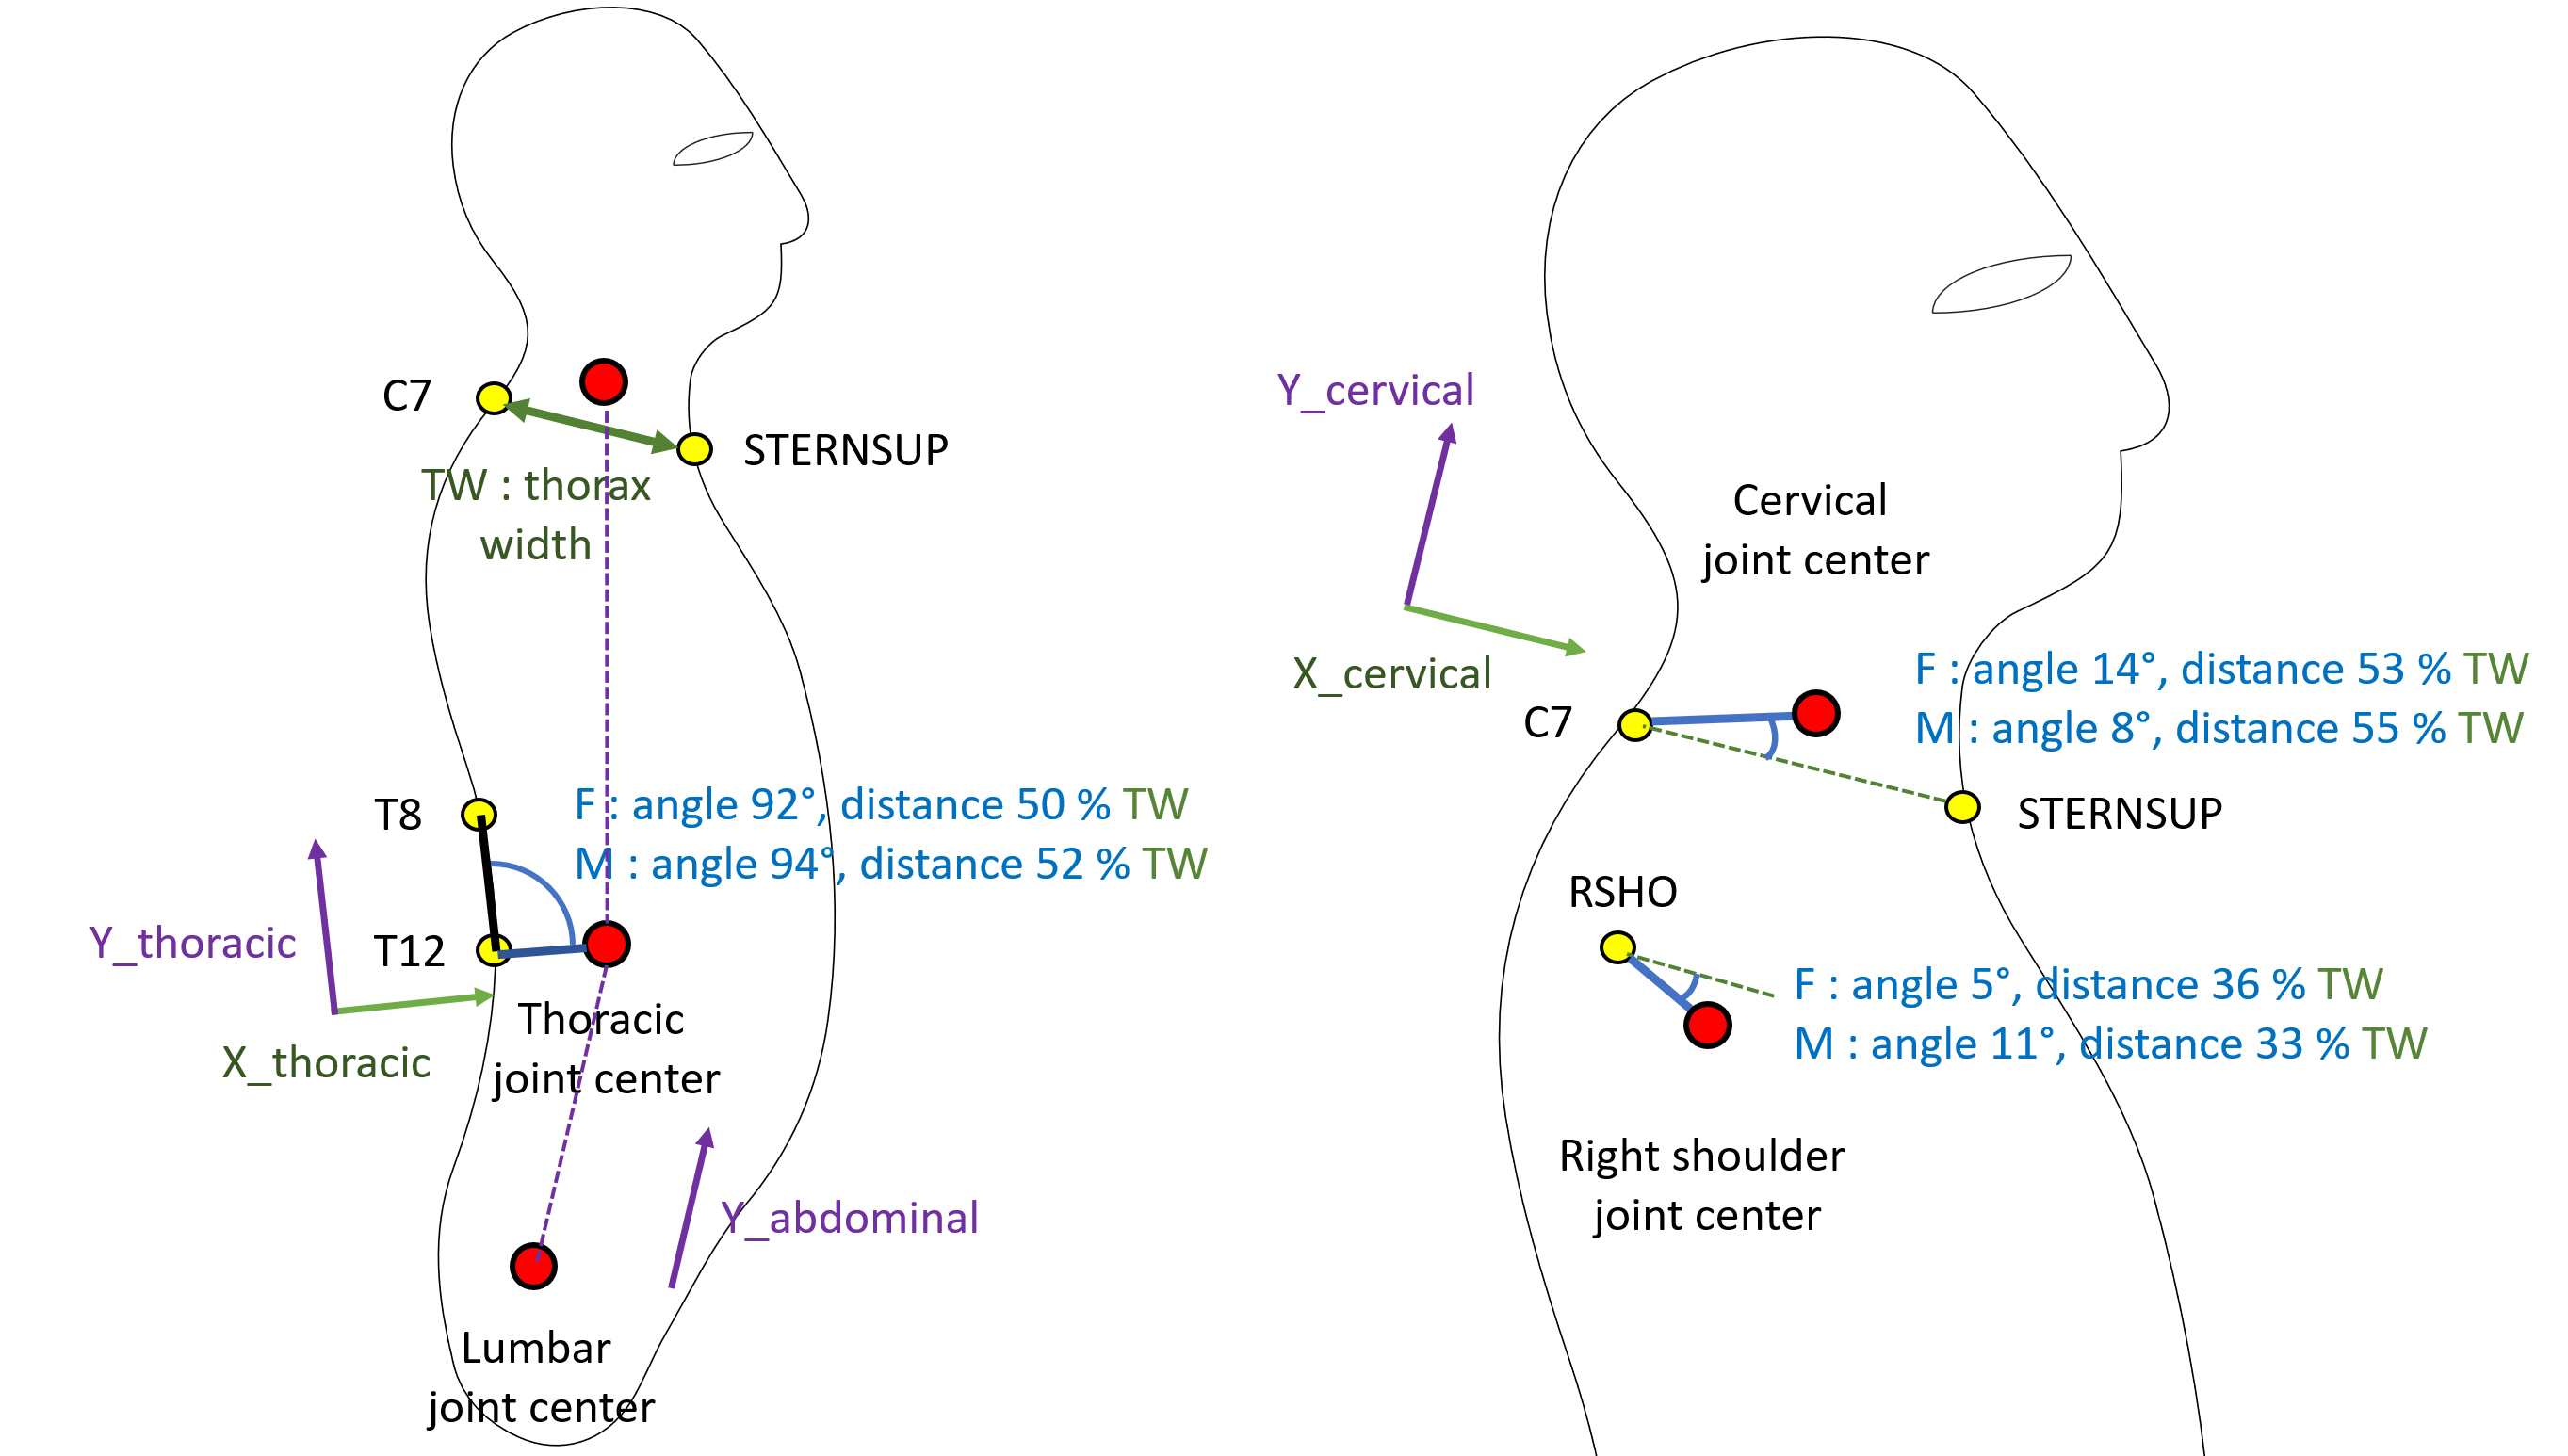

In [9]:
from numpy import pi, sin, cos
Trunk_angles =  {'Thorax'  : {'female': 92*pi/180, 'male':94*pi/180},
                 'Cervical': {'female': 14*pi/180, 'male':8*pi/180},
                 'Shoulder': {'female': -5*pi/180, 'male':-11*pi/180}} # in radian
Trunk_scaling = {'Thorax'  : {'female': 0.50, 'male':0.52},
                 'Cervical': {'female': 0.53, 'male':0.55},
                 'Shoulder': {'female': 0.36, 'male':0.33}}

def Trunk(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin):
        
    if 'C7' in Labels and 'STERNSUP' in Labels:    
        # The positions of the joint centers are scaled by the thorax width
        thorax_width = Distance(Position['C7'],Position['STERNSUP'])
        
        # Reference method (Dumas et al. 2015)
        if ('T8' in Labels and 'T12' in Labels): 
            # The thorax sagittal plane contains C7, STERNSUP and T8: it is spanned by x_cervical and y_cervical
            x_cervical = Normalise(Position['STERNSUP']-Position['C7'])
            z_cervical = Normalise(numpy.cross(x_cervical,Position['C7']-Position['T8'], axis = 0)) # direction orthogonal to the thorax sagittal plane
            y_cervical = numpy.cross(z_cervical,x_cervical, axis = 0)
            
            # Projection of the T12-T8 segment onto the thorax sagittal plane
            T12_T8          = Position['T8']-Position['T12']
            T12_T8_sagittal = Projection(T12_T8,x_cervical) + Projection(T12_T8,y_cervical)
            y_thoracic      = Normalise(T12_T8_sagittal)
            x_thoracic      = numpy.cross(y_thoracic, z_cervical, axis = 0)
            
            angle = Trunk_angles['Thorax'][sex]
            Thorax_JC = Position['T12'] + thorax_width*Trunk_scaling['Thorax'][sex]*(sin(angle)*x_thoracic+cos(angle)*y_thoracic)
            Joint_centers['Thorax'] = Thorax_JC
            
        # The abdomen and thorax are merged into a single trunk segment, as in (Dumas et al., 2007).
        else: 
            # The trunk sagittal plane contains C7, STERNSUP and the lumbar joint center: it is spanned by x_cervical and y_cervical
            x_cervical = Normalise(Position['STERNSUP']-Position['C7'])
            z_cervical = Normalise(numpy.cross(x_cervical,Position['C7']-Joint_centers['Lumbar'], axis = 0)) # direction orthogonal to the thorax sagittal plane
            y_cervical = numpy.cross(z_cervical,x_cervical, axis = 0)
            
        # Cervical and shoulder joint centers 
        angle = Trunk_angles['Cervical'][sex]
        Joint_centers['Cervical'] = Position['C7'] + thorax_width*Trunk_scaling['Cervical'][sex]*(cos(angle)*x_cervical+sin(angle)*y_cervical)
        for side in ['L','R']:
            angle = Trunk_angles['Shoulder'][sex]
            Joint_centers[side+'_shoulder'] = Position[side+'SHO']+thorax_width*Trunk_scaling['Shoulder'][sex]*(cos(angle)*x_cervical+sin(angle)*y_cervical)
        
        ## Segment coordinate systems
        if ('T8' in Labels and 'T12' in Labels):
            # Thorax segment
            Y = Normalise(Joint_centers['Cervical']-Joint_centers['Thorax'])
            X = numpy.cross(Y,z_cervical, axis = 0)
            SegmentCoordinateSystem['Thorax'] = (X, Y, z_cervical)
            SegmentOrigin['Thorax'] = Joint_centers['Cervical']
            SegmentLength['Thorax'] = Distance(Joint_centers['Cervical'],Joint_centers['Thorax'])
                                       
            # Abdomen segment
            Y = Normalise(Joint_centers['Thorax']-Joint_centers['Lumbar'])
            x_mid = 0.5*SegmentCoordinateSystem['Thorax'][0]+SegmentCoordinateSystem['Pelvis'][0]
            Z = Normalise(numpy.cross(x_mid, Y, axis = 0))
            X = numpy.cross(Y, Z, axis = 0)
            SegmentCoordinateSystem['Abdomen'] = (X, Y, Z)
            SegmentOrigin['Abdomen'] = Joint_centers['Thorax']
            SegmentLength['Abdomen'] = Distance(Joint_centers['Thorax'],Joint_centers['Lumbar'])
        else:
            # Trunk segment
            Y = Normalise(Joint_centers['Cervical']-Joint_centers['Lumbar'])
            X = numpy.cross(Y,z_cervical, axis = 0)
            SegmentCoordinateSystem['Torso'] = (X, Y, z_cervical)
            SegmentOrigin['Torso'] = Joint_centers['Cervical']
            SegmentLength['Torso'] = Distance(Joint_centers['Cervical'],Joint_centers['Lumbar'])
                 

    ## Simplified method of Tisserand et al. 2016 with a single trunk segment
    else:
        # the shoulder joint centers correspond to the left and right acromions (LSHO and RSHO)
        for side in ['L','R']:
            Joint_centers[side+'_shoulder'] = Position[side+'SHO']
        if 'C7' in Labels:
            Joint_centers['Cervical'] = Position['C7']
        else:         
            # the cervical joint center is calculated as the midpoint between the LSHO and RSHO
            Joint_centers['Cervical'] = 0.5*(Position['LSHO']+Position['RSHO'])
                 
        # the longitudinal direction is from the lumbar to the cervical joint center
        Y = Normalise(Joint_centers['Cervical']-Joint_centers['Lumbar'])
        # the other directions cannot be calculated
        X = numpy.zeros(numpy.shape(Y))
        Z = numpy.zeros(numpy.shape(Y))
        SegmentCoordinateSystem['Torso'] = (X, Y, Z)
        SegmentOrigin['Torso']           = Joint_centers['Cervical']
        SegmentLength['Torso']           = Distance(Joint_centers['Cervical'],Joint_centers['Lumbar'])           

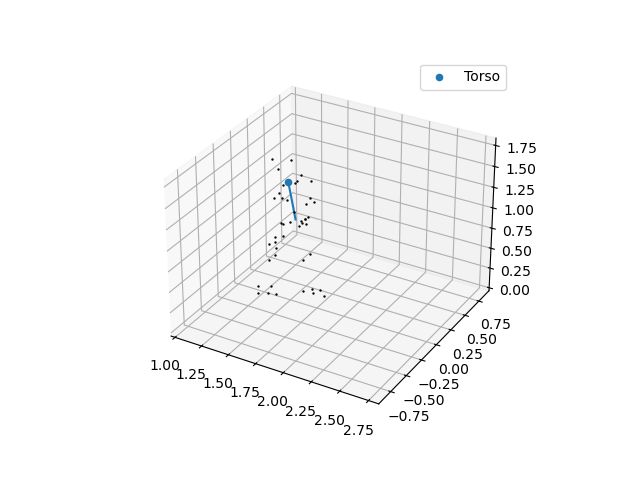

In [10]:
kinematics.calculate_Trunk(kinematics.Labels)
visualise(kinematics, segments = ['Torso'])
plt.show()

The simplified method can be used to calculate the trunk segments by providing a reduced list of labels.

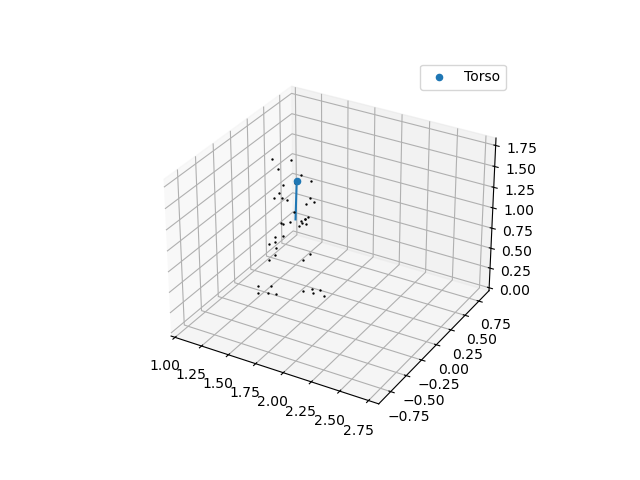

In [11]:
kinematics.calculate_Trunk(Labels = ['C7'])
visualise(kinematics, segments = ['Torso'])
plt.show()

### Head
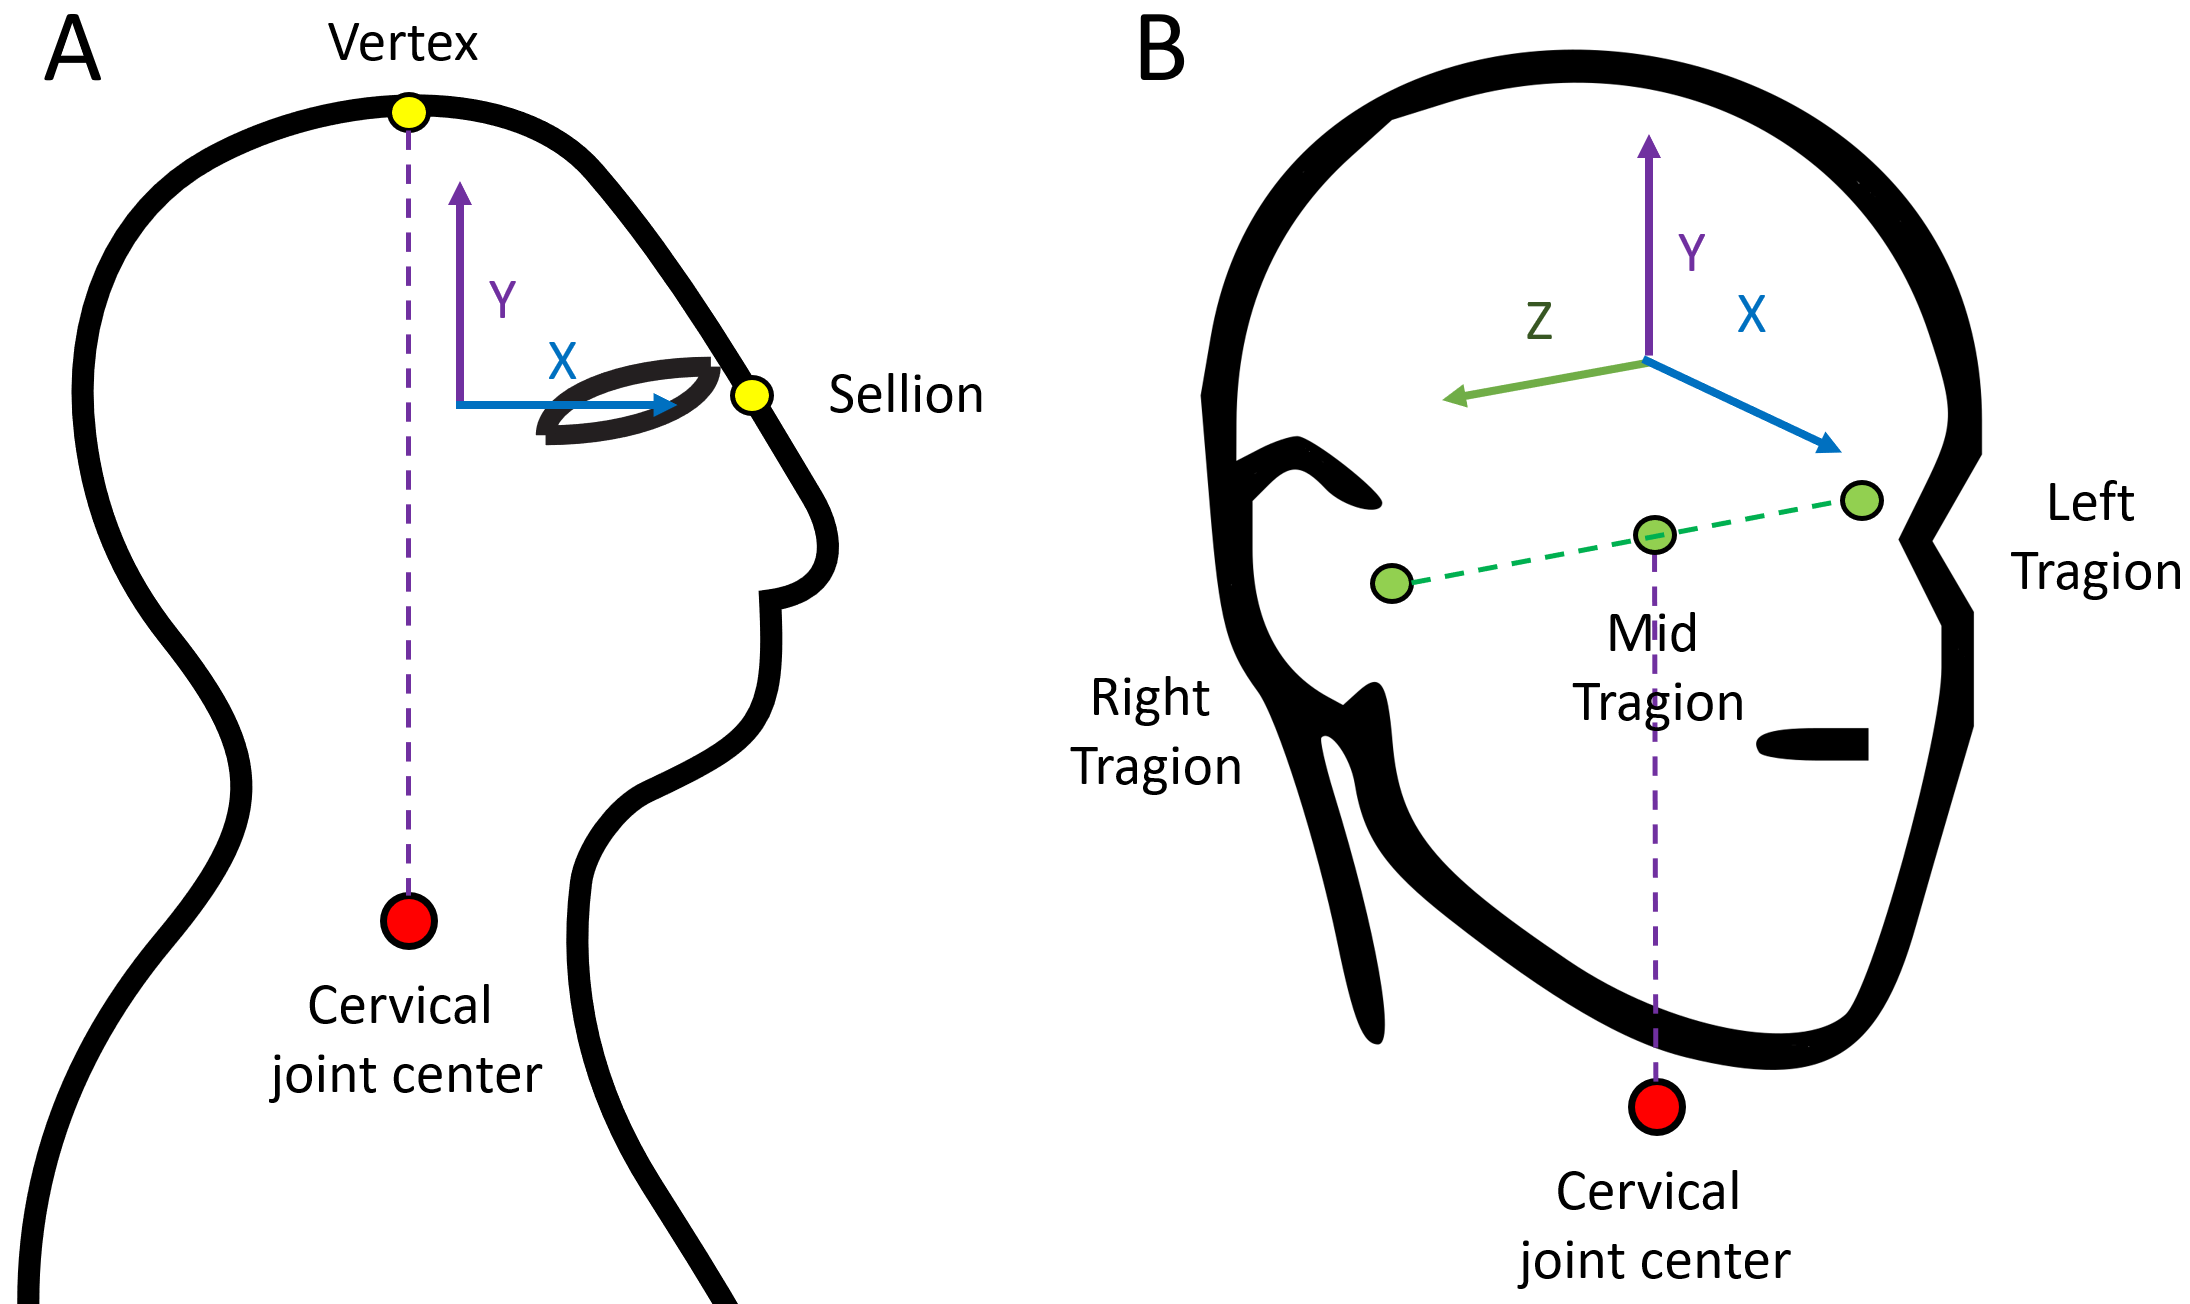

In [12]:
def Head(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin):
    SegmentOrigin['Head'] = Joint_centers['Cervical']
    if ('Vertex' in Labels and 'Sellion' in Labels): # (Dumas and Wojtusch 2018)
        Y = Normalise(Position['Vertex']-Joint_centers['Cervical'])
        Z = Normalise(numpy.cross(Position['Sellion']-Joint_centers['Cervical'], Y, axis = 0))
        X = numpy.cross(Y,Z, axis = 0)
        SegmentLength['Head'] = Distance(Joint_centers['Cervical'], Position['Vertex'])
        SegmentCoordinateSystem['Head'] = (X,Y,Z)
    else:
        # The segment length is scaled with the Thorax length if present, with the Torso length otherwise
        if 'Thorax' in SegmentLength.keys():
            SegmentLength['Head'] = SegmentLength['Thorax']*Ref_length['Head'][sex]/Ref_length['Thorax'][sex]
        else:
            SegmentLength['Head'] = SegmentLength['Torso']*Ref_length['Head'][sex]/Ref_length['Torso'][sex]
        
        # If two markers are placed symetrically either on the left and right tragion, or on a headband
        if ('HEADL' in Labels and 'HEADR' in Labels): 
            midHead = 0.5*(Position['HEADL']+Position['HEADR'])
            Y = Normalise(midHead-Joint_centers['Cervical'])
            X = Normalise(numpy.cross(Y, Position['HEADR']-Position['HEADL'], axis = 0))
            Z = numpy.cross(X,Y, axis = 0)
            SegmentCoordinateSystem['Head'] = (X,Y,Z)
        else: # If head markers are not present, then similarly to Tisserand et al. (2016)
            # the head SCS is assumed to match that of the Thorax (if available) or Torso (otherwise)
            if 'Thorax' in SegmentCoordinateSystem.keys():
                SegmentCoordinateSystem['Head'] = SegmentCoordinateSystem['Thorax']
            elif 'Torso' in SegmentCoordinateSystem.keys():
                SegmentCoordinateSystem['Head'] = SegmentCoordinateSystem['Torso']    

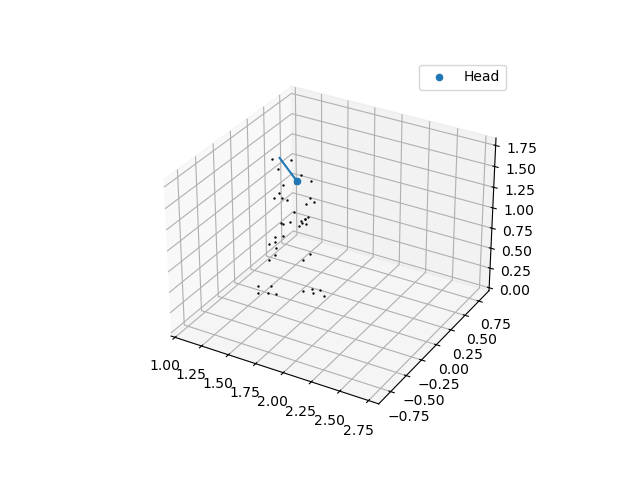

In [13]:
kinematics.calculate_Head(kinematics.Labels)
visualise(kinematics, segments = ['Head'])
plt.show()

The simplified method can be used to calculate the head segment by providing an empty label list.

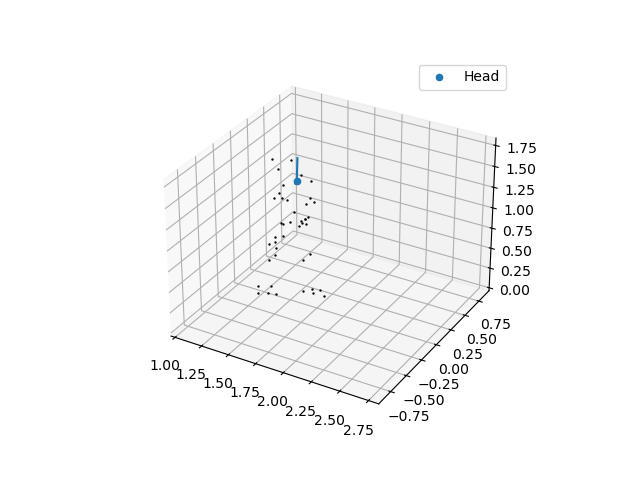

In [14]:
kinematics.calculate_Head([])
visualise(kinematics, segments = ['Head'])
plt.show()

## Limbs

### Overview

The  coordinate systems of the limb segments are all calculated in a similar manner (except for the feet). The segment origin is the proximal joint center and the segment length is the distance from the proximal to the distal joint center.

#### Reference method

The reference method uses the proximal joint center (TOP, panels A-C) and two distal markers placed medially and laterally of the distal joint center (RIGHT and LEFT, panels A-C). The distal joint center is placed at the mid-point between the two distal markers (RIGHT and LEFT). The Y axis is from the distal to the proximal joint center. The X axis is orthogonal to the plane containing the proximal joint center and the two distal markers, pointing forwards. The Z axis is orthogonal to X and Y, pointing rightwards.

For example, for the upper arm, the proximal joint is the shoulder joint center (TOP, panels B-C). For the right upper arm (panel B), the rightwards distal marker (RIGHT) is the right humeral lateral epicondyle (RELL) and the leftwards one is the right humeral medial epicondyle (RELM). For the left upper arm, the lateral and medial distal markers are flipped (panel C): RIGHT corresponds to the left humeral lateral epicondyle (LELM) and the LEFT to the left humeral medial epicondyle (LELL). In this way, when the person stands in the reference anatomical posture, the Z-axis of all limb segments is oriented rightwards.

Note that for the feet (panel D), the calcaneus marker on the heel (LCAL2 and RCAL2) is taken as the TOP marker rather than the ankle joint (Dumas and Wojtusch 2018, Table 10). The X axis (forwards) - rather than the Y axis (upwards) - is from the ankle to the toe joint.
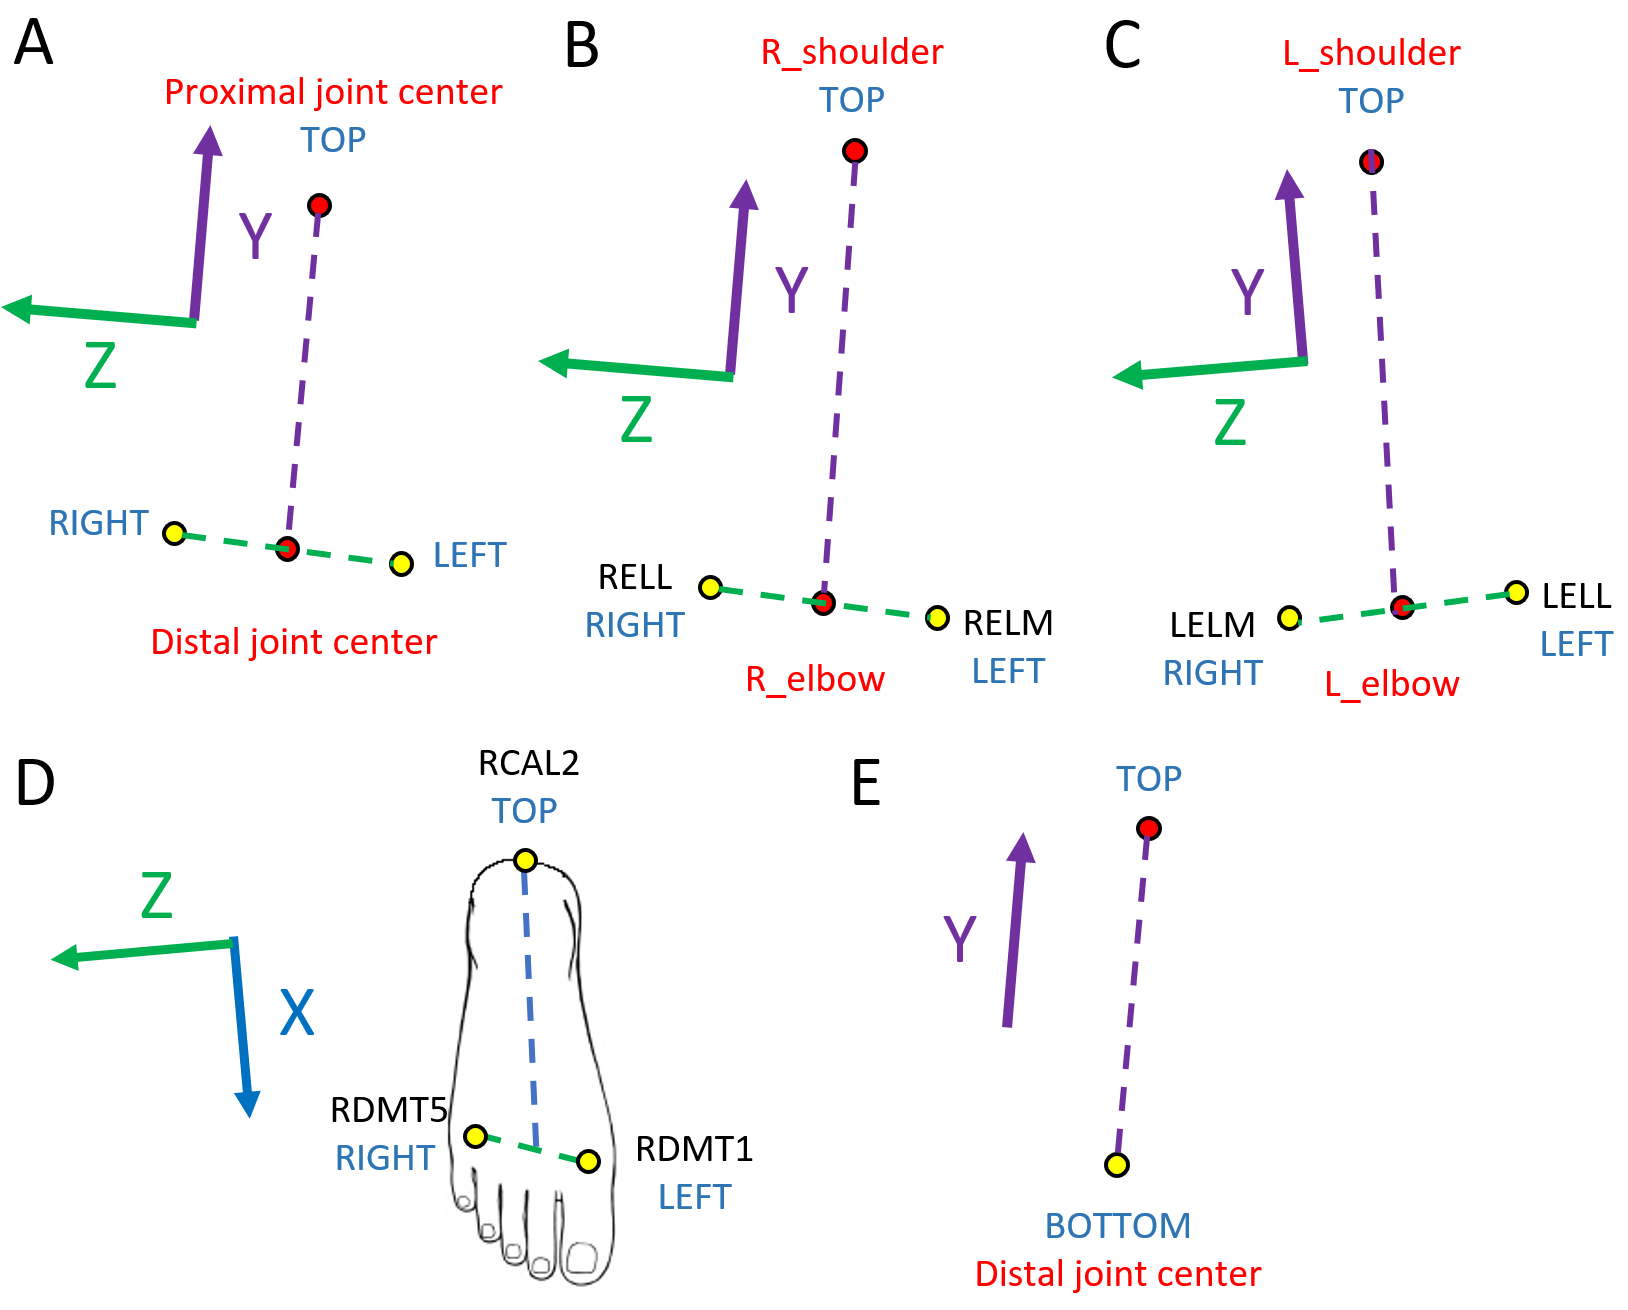

In [15]:
# Markers placed laterally and medially of the distal joint
LateralMedialMarkers = {
'Elbow': ('ELL','ELM'), # humeral lateral epicondyle, humeral medial epicondyle
'Wrist': ('WRR','WRU'), # radial styloid process, ulnar styloid process
'Finger': ('DMC2','DMC5'), # distal metacarpal II, distal metacarpal V
'Knee': ('FLE','FME'), # femoral lateral epicondyle, femoral medial epicondyle
'Ankle': ('LMAL','MMAL'), # lateral malleolus, medial malleolus
'Toe': ('DMT5','DMT1') # distal metatarsal V, distal metatarsal I
}

# For the limbs on the left side of the body, lateral markers are leftwards of the joint and medial markers are rightwards
# For the limbs on the right side of the body, lateral markers are rightwards of the joint and medial markers are leftwards
def LeftwardRightward(joint,side):
    '''identifies the markers that are on the left and right of a given joint (when the body is in the reference anatomical position)
    
    Parameters
    ----------
    joint: str
        name of a joint on the upper or lower limbs ('Elbow', 'Wrist', 'Finger', 'Knee', 'Ankle' or 'Toe')
    side: str 
        side of the body on which the joint is (either 'L': left, or 'R': right)
    
    Returns
    -------   
    LeftMarker: str
        name of the marker to the left of the joint
    RightMarker: str
        name of the marker to the right of the joint
    '''
    if side == 'L':
        return side+LateralMedialMarkers[joint][0], side+LateralMedialMarkers[joint][1]
    elif side == 'R':
        return side+LateralMedialMarkers[joint][1], side+LateralMedialMarkers[joint][0]
    
def LimbSegment(Top,Leftward,Rightward):
    '''Calculates the joint center, length and segment coordinate system of a limb segment
    
    Parameters
    ----------
    Top: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the joint center at the upper extremity of the segment
    Leftward: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the marker at the lower left end of the segment
    Rightward: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the marker at the lower right end of the segment
    
    Returns
    -------   
    JointCenter: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the joint center at the lower extremity of the segment
    length: float
        segment length (between the joint centers at the upper and lower extremities of the segment)
    (X,Y,Z): tuple of (3,NbOrSamples) numpy.ndarray
        3D trajectories of the segment coordinate system's axes:
        X antero-posterior (forwards),
        Y longitudinal (upwards),
        Z lateral (rightwards)
    '''
    JointCenter = 0.5*(Leftward+Rightward)
    length      = Distance(Top, JointCenter)
    Y = Normalise(Top - JointCenter)
    X = Normalise(numpy.cross(Y,Rightward-Leftward, axis = 0))
    Z = numpy.cross(X,Y, axis = 0)
    return JointCenter, length, (X,Y,Z)

#### Simplified methods
If a single distal marker is available (panel E, BOTTOM), we apply a simplified method (Tisserand et al. 2016): the distal joint center is assumed to be at the BOTTOM marker. Only the Y-axis is available, from the distal to the proximal joint center.

For the hands (respectively feet), if no distal marker is present, the segment coordinate system is assumed to match that of the forearm (respectively shank), and the segment length is scaled by the length of the proximal segment. 

In [16]:
# If a single distal marker is present, we use the simplified method of Tisserand et al., 2016
def LimbSegmentSimple(Top,Bottom):
    '''Calculates the length and reduced segment coordinate system of a limb segment
    
    Parameters
    ----------
    Top: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the joint center at the upper extremity of the segment
    Bottom: (3,NbOrSamples) numpy.ndarray
        3D trajectory of the joint center at the lower extremity of the segment
    
    Returns
    -------   
    length: float
        segment length (between the joint centers at the upper and lower extremities of the segment)
    (X,Y,Z): tuple of (3,NbOrSamples) numpy.ndarray
        3D trajectories of the segment coordinate system's axes:
        X antero-posterior (forwards) = numpy.zeros((3, NbOrSamples)),
        Y longitudinal (upwards),
        Z lateral (rightwards) = numpy.zeros((3, NbOrSamples))
    '''
    length = Distance(Top, Bottom)
    Y = Normalise(Top - Bottom)
    X = numpy.zeros(numpy.shape(Y))
    Z = numpy.zeros(numpy.shape(Y))
    return length, (X,Y,Z)

In [17]:
def UpperLimbs(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin):
    for side in ['L','R']:
        
        # Upper arm
        SegmentOrigin[side+'_UpperArm'] = Joint_centers[side+'_shoulder']
        Left, Right = LeftwardRightward('Elbow',side)
        if (Left in Labels and Right in Labels):
            Joint_centers[side+'_elbow'], SegmentLength[side+'_UpperArm'], SegmentCoordinateSystem[side+'_UpperArm'] = LimbSegment(Joint_centers[side+'_shoulder'],Position[Left],Position[Right])
        elif side+'ELL' in Labels: # Tisserand et al. 2016
            Joint_centers[side+'_elbow'] = Position[side+'ELL']
            SegmentLength[side+'_UpperArm'], SegmentCoordinateSystem[side+'_UpperArm'] = LimbSegmentSimple(Joint_centers[side+'_shoulder'],Joint_centers[side+'_elbow'])
        
        # Forearm
        SegmentOrigin[side+'_Forearm'] = Joint_centers[side+'_elbow']
        Left, Right = LeftwardRightward('Wrist',side)
        if (Left in Labels and Right in Labels):
            Joint_centers[side+'_wrist'], SegmentLength[side+'_Forearm'], SegmentCoordinateSystem[side+'_Forearm'] = LimbSegment(Joint_centers[side+'_elbow'],Position[Left],Position[Right])
        elif side+'WRU' in Labels: # Tisserand et al. 2016
            Joint_centers[side+'_wrist'] = Position[side+'WRU']
            SegmentLength[side+'_Forearm'], SegmentCoordinateSystem[side+'_Forearm'] = LimbSegmentSimple(Joint_centers[side+'_elbow'],Joint_centers[side+'_wrist'])
        
        # Hand
        SegmentOrigin[side+'_Hand'] = Joint_centers[side+'_wrist']
        Left, Right = LeftwardRightward('Finger',side)
        if (Left in Labels and Right in Labels):
            Finger_joint, SegmentLength[side+'_Hand'], SegmentCoordinateSystem[side+'_Hand'] = LimbSegment(Joint_centers[side+'_wrist'],Position[Left],Position[Right])
        elif side+'DMC5' in Labels: # adaptation of Tisserand et al., 2016
            Finger_joint = Position[side+'DMC5']
            SegmentLength[side+'_Hand'], SegmentCoordinateSystem[side+'_Hand'] = LimbSegmentSimple(Joint_centers[side+'_wrist'],Finger_joint)
        else: # adaptation of Tisserand et al. 2016
            SegmentCoordinateSystem[side+'_Hand'] = SegmentCoordinateSystem[side+'_Forearm']
            SegmentLength[side+'_Hand'] = SegmentLength[side+'_Forearm']*Ref_length['Hand'][sex]/Ref_length['Forearm'][sex]
        
        
def LowerLimbs(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin):
    for side in ['L','R']:
        
        # Thigh
        SegmentOrigin[side+'_Thigh'] = Joint_centers[side+'_hip']
        Left, Right = LeftwardRightward('Knee',side)
        if (Left in Labels and Right in Labels):
            Joint_centers[side+'_knee'], SegmentLength[side+'_Thigh'], SegmentCoordinateSystem[side+'_Thigh'] = LimbSegment(Joint_centers[side+'_hip'],Position[Left],Position[Right])
        elif side+'FLE' in Labels: # Tisserand et al. 2016
            Joint_centers[side+'_knee'] = Position[side+'FLE']
            SegmentLength[side+'_Thigh'], SegmentCoordinateSystem[side+'_Thigh'] = LimbSegmentSimple(Joint_centers[side+'_hip'],Joint_centers[side+'_knee'])
        
        # Shank
        SegmentOrigin[side+'_Shank'] = Joint_centers[side+'_knee']
        Left, Right = LeftwardRightward('Ankle',side)
        if (Left in Labels and Right in Labels):
            Joint_centers[side+'_ankle'], SegmentLength[side+'_Shank'], SegmentCoordinateSystem[side+'_Shank'] = LimbSegment(Joint_centers[side+'_knee'],Position[Left],Position[Right])
        elif side+'LMAL' in Labels: # Tisserand et al. 2016
            Joint_centers[side+'_ankle'] = Position[side+'LMAL']
            SegmentLength[side+'_Shank'], SegmentCoordinateSystem[side+'_Shank'] = LimbSegmentSimple(Joint_centers[side+'_knee'],Joint_centers[side+'_ankle'])
        
        # Foot
        SegmentOrigin[side+'_Foot'] = Joint_centers[side+'_ankle']
        Left, Right = LeftwardRightward('Toe',side)
        if (side+'CAL2' in Labels and Left in Labels and Right in Labels):
            Toe_joint, Foot_length, (X,Y,Z) = LimbSegment(Position[side+'CAL2'],Position[Left],Position[Right])
            SegmentCoordinateSystem[side+'_Foot'] = (-Y,X,Z)
            SegmentLength[side+'_Foot'] = Distance(Joint_centers[side+'_ankle'],Toe_joint)
        else: # adapted from Tisserand et al. 2016
            SegmentCoordinateSystem[side+'_Foot'] = SegmentCoordinateSystem[side+'_Shank']
            SegmentLength[side+'_Foot'] = SegmentLength[side+'_Shank']*Ref_length['Foot'][sex]/Ref_length['Shank'][sex]

### Arms

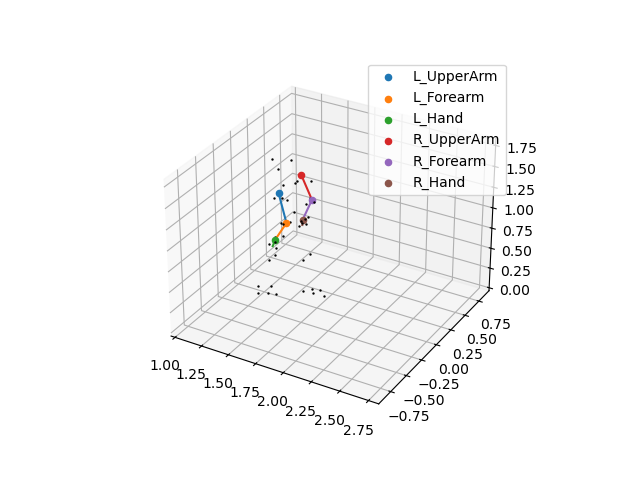

In [18]:
kinematics.calculate_UpperLimbs(kinematics.Labels)
visualise(kinematics, segments = ['L_UpperArm','L_Forearm','L_Hand','R_UpperArm','R_Forearm','R_Hand'])
plt.show()

The simplified method can be used to calculate the arm segments by providing a reduced list of marker labels.

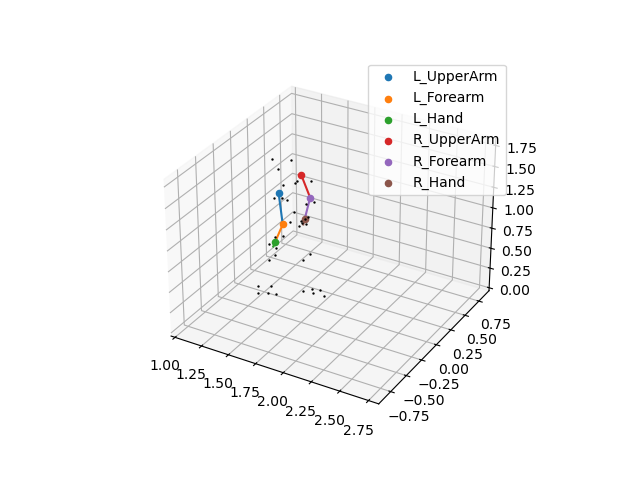

In [19]:
kinematics.calculate_UpperLimbs(Labels = ['LELL','LWRU','RELL','RWRU'])
visualise(kinematics, segments = ['L_UpperArm','L_Forearm','L_Hand','R_UpperArm','R_Forearm','R_Hand'])
plt.show()

### Legs

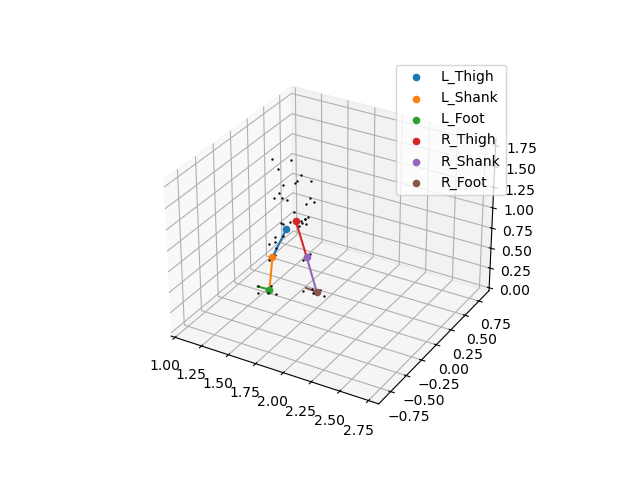

In [20]:
kinematics.calculate_LowerLimbs(kinematics.Labels)
visualise(kinematics, segments = ['L_Thigh','L_Shank','L_Foot','R_Thigh','R_Shank','R_Foot'])
plt.show()

The simplified method can be used to calculate the leg segments by providing a reduced list of marker labels.

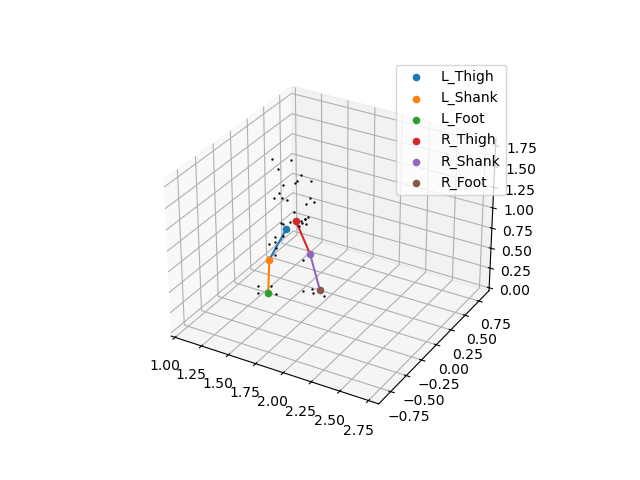

In [21]:
kinematics.calculate_LowerLimbs(Labels = ['LFLE','LLMAL','RFLE','RLMAL'])
visualise(kinematics, segments = ['L_Thigh','L_Shank','L_Foot','R_Thigh','R_Shank','R_Foot'])
plt.show()

## Whole body Center of Mass

The whole body center of mass can be calculated using the previously calculated segment data.

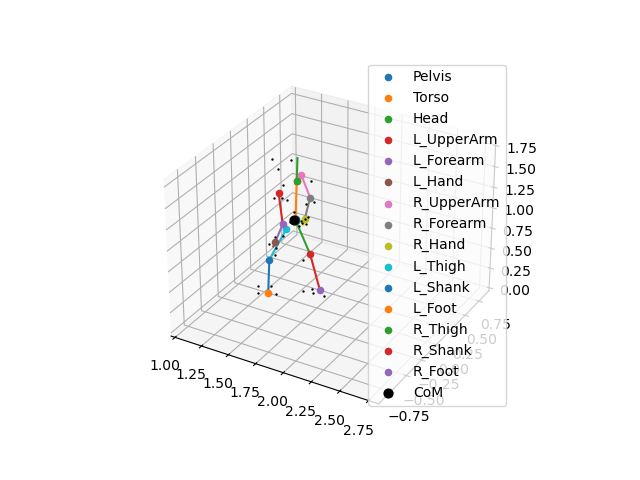

In [22]:
CoM = kinematics.calculate_CoM()
ax = visualise(kinematics, segments = list(kinematics.SegmentCoordinateSystem.keys()))
com = CoM[:,500]   
ax.scatter(com[0],com[1],com[2], color = 'k', s=40, label = 'CoM')
ax.legend()
plt.show()

The calculate_CoM function calculates any segments which have not already been calculated.

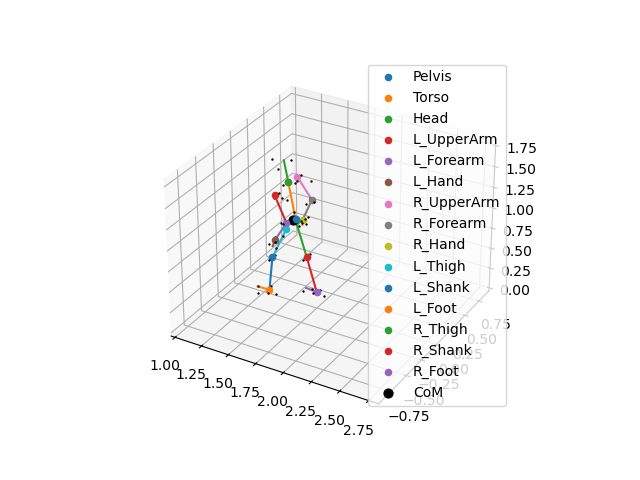

In [23]:
kinematics    = Kinematics(Position, Labels, sex)
Kinematic_com = kinematics.calculate_CoM()
ax = visualise(kinematics, segments = list(kinematics.SegmentCoordinateSystem.keys()))
com = Kinematic_com[:,500]   
ax.scatter(com[0],com[1],com[2], color = 'k', s=40, label = 'CoM')
ax.legend()
plt.show()